In [1]:
!pip install deap scikit-learn matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 2.8 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from deap import base, creator, tools, algorithms

In [3]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
def evaluate(individual):
    C = max(0.01, individual[0])
    gamma = max(0.001, individual[1])
    try:
        clf = SVC(C=C, gamma=gamma)
        score = cross_val_score(clf, X, y, cv=5).mean()
    except Exception:
        score = 0
    return score,
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("attr_float", random.uniform, 0.01, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [5]:
def main():
    random.seed(42)
    population = toolbox.population(n=30)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    population, logbook = algorithms.eaSimple(
        population, toolbox,
        cxpb=0.5, mutpb=0.2,
        ngen=20, stats=stats, verbose=True
    )
    return population, logbook
population, logbook = main()

gen	nevals	avg     	std      	min     	max    
0  	30    	0.666193	0.0974314	0.627418	0.95954
1  	14    	0.706792	0.122342 	0.627418	0.966636
2  	24    	0.745461	0.130061 	0.627418	0.966636
3  	20    	0.867496	0.114583 	0.630927	0.973653
4  	9     	0.943775	0.0476052	0.803121	0.973653
5  	21    	0.969501	0.00404019	0.956094	0.973653
6  	21    	0.972016	0.00197103	0.966636	0.973653
7  	19    	0.973127	0.000803961	0.971899	0.973653
8  	12    	0.973478	0.000526316	0.971899	0.973653
9  	21    	0.973361	0.000653821	0.971899	0.973653
10 	16    	0.973361	0.000653821	0.971899	0.973653
11 	20    	0.973536	0.000437621	0.971899	0.973653
12 	16    	0.973478	0.00152852 	0.971899	0.980686
13 	17    	0.972246	0.0100522  	0.919096	0.980686
14 	11    	0.973244	0.00828024 	0.943766	0.980686
15 	19    	0.970021	0.027924   	0.831268	0.980686
16 	15    	0.967738	0.0505071  	0.699488	0.980686
17 	18    	0.978459	0.00677774 	0.943766	0.980686
18 	19    	0.978692	0.00823802 	0.934932	0.980686
19 	14    	0.971

In [6]:
best_individual = tools.selBest(population, 1)[0]
best_C = max(0.01, best_individual[0])
best_gamma = max(0.001, best_individual[1])
print("\nMejor configuración encontrada:")
print(f"C = {best_C:.4f}, gamma = {best_gamma:.4f}")
print(f"Precisión CV = {best_individual.fitness.values[0]:.4f}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model = SVC(C=best_C, gamma=best_gamma)
final_model.fit(X_train, y_train)
test_acc = final_model.score(X_test, y_test)
print(f"Precisión en test = {test_acc:.4f}")


Mejor configuración encontrada:
C = 8.9973, gamma = 0.0129
Precisión CV = 0.9807
Precisión en test = 0.9825


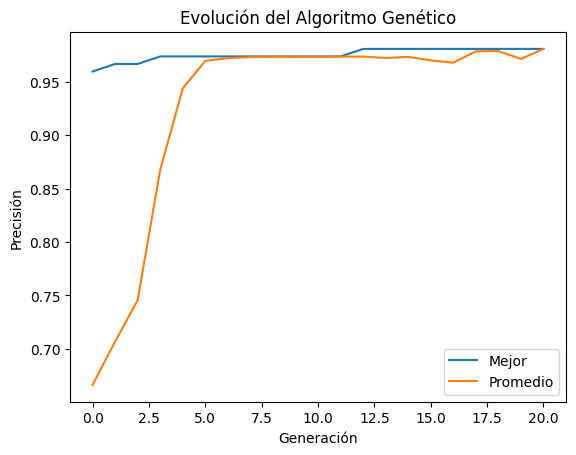

In [7]:
gen = logbook.select("gen")
fit_maxs = logbook.select("max")
fit_avgs = logbook.select("avg")
plt.plot(gen, fit_maxs, label="Mejor")
plt.plot(gen, fit_avgs, label="Promedio")
plt.xlabel("Generación")
plt.ylabel("Precisión")
plt.title("Evolución del Algoritmo Genético")
plt.legend()
plt.show()